In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [70]:
white = pd.read_csv("winequality-white.csv")

def define_quality_labels(v):
  if v <= 5:
    return 0
  if v <= 7:
    return 1
  return 2

white.columns = white.columns.str.replace(" ", "_")

In [71]:
white['quality_label'] = white['quality'].apply(define_quality_labels)

white['quality_label'] = pd.Categorical(white['quality_label'], categories=[0, 1, 2])

# white['bound_sulfur_dioxide'] = white['total_sulfur_dioxide'] - white['free_sulfur_dioxide']

dfml_white = white.copy()

# dfml_white.info()

# manual attempt at outlier removal 
# dfml_white = dfml_white[(dfml_white['total_sulfur_dioxide'] < 350) & (dfml_white['free_sulfur_dioxide'] < 200) & (dfml_white['residual_sugar'] < 50)]

# use interquartile range to remove outliers
# Q1 = dfml_white.quantile(0.25)
# Q3 = dfml_white.quantile(0.75)
# IQR = Q3 - Q1
# # print(IQR)
# new_df = dfml_white[~((dfml_white < (Q1 - 1.5 * IQR)) |(dfml_white > (Q3 + 1.5 * IQR))).any(axis=1)]
# new_df

dfml_white.drop(['quality', 'density'], axis=1, inplace=True)
dfml_white


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,1


In [72]:
# encoding
# cat_col_encode = pd.get_dummies(dfml_white['quality_label'])
# dfml_white = pd.concat([dfml_white, cat_col_encode], axis=1)
# dfml_white.drop(columns=['free_sulfur_dioxide', 'quality_label', 'quality'], axis=1, inplace=True)
# dfml_white.head()

# encoder = OrdinalEncoder()
# encoder.fit(dfml_white[['quality_label']])
# dfml_white[['quality_label']] = encoder.transform(dfml_white[['quality_label']])

# encoder.fit(dfml_red[['quality_label']])
# dfml_red[['quality_label']] = encoder.transform(dfml_red[['quality_label']])

# dfml_white

# 0 = high, 1 = low, 2 = medium

# White Wine Logistic Regression

In [73]:
y = dfml_white['quality_label']
X = dfml_white.drop(['quality_label'], axis=1)

# kf = StratifiedKFold() # kf = KFold()
# for train_i, test_i in skf.split(X, y):
#     X_train, X_test = X.iloc[train_i], X.iloc[test_i]
#     y_train, y_test = y[train_i], y[test_i]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# X_train.groupby(['quality_label'])['quality_label'].count() #don't drop quality label in order to see this 
# dfml_white.groupby(['quality_label'])['quality_label'].count()

(3281, 10) (1617, 10)
(3281,) (1617,)


In [74]:
from sklearn.preprocessing import RobustScaler

# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [75]:
# LogisticRegression model
# LR_model = LogisticRegression(solver='liblinear', random_state=42)
LR_model = LogisticRegression(random_state=42, max_iter=10000)

# fit model
LR_model.fit(X_train_standard, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [76]:
preds = LR_model.predict(X_test_standard)

acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print("accuracy: ", acc)
print("confusion_matrix: \n", cm)
print(classification_report(y_test, preds))

# slightly improved by removing free + total SO2

accuracy:  0.7192331478045764
confusion_matrix: 
 [[281 243   1]
 [153 882   0]
 [  1  56   0]]
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       525
           1       0.75      0.85      0.80      1035
           2       0.00      0.00      0.00        57

    accuracy                           0.72      1617
   macro avg       0.46      0.46      0.46      1617
weighted avg       0.69      0.72      0.70      1617



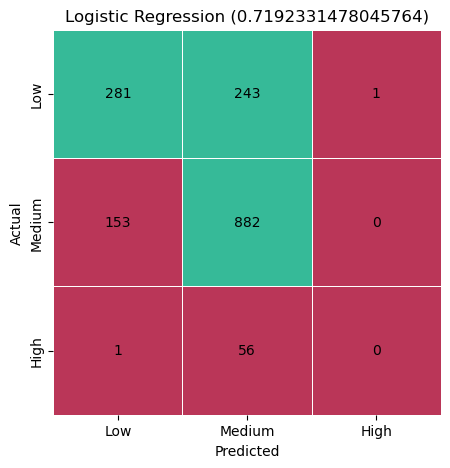

In [77]:
plt.figure(figsize=(5,5))

cm_df = pd.DataFrame(cm, index=["Low", "Medium", "High"], columns=["Low", "Medium", "High"])

cmap = sns.color_palette(["#BA3658", "#36BA98", "#BA3658", "#36BA98"])
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5, linecolor='white', annot_kws={"color": "black"})

plt.title('Logistic Regression (' + str(acc) + ')')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



# White Wine Random Forest

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
dfml_white.groupby(['quality_label'])['quality_label'].count()

C:\Users\emily\AppData\Local\Temp\ipykernel_17424\264442904.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfml_white.groupby(['quality_label'])['quality_label'].count()


quality_label
0    1640
1    3078
2     180
Name: quality_label, dtype: int64

In [80]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(random_state=42) #, class_weight='balanced')

# param_grid = { 
#     'n_estimators': [10, 100, 300, 500],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': np.arange(2, 9),
#     'max_features': [3, 6, 9]
# }

# grid = GridSearchCV(estimator=RF_clf, param_grid=param_grid, cv=5, error_score='raise')
# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

# The best parameters are {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 70} with a score of 0.77
# The best parameters are {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'n_estimators': 70} with a score of 0.77
# The best parameters are {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'n_estimators': 300} with a score of 0.77

In [81]:
# grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
# grid_results

In [82]:
# fit model
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
score = RF_clf.score(X_test, y_test)

# predictions
preds = RF_clf.predict(X_test)

# accuracy
acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)


print("accuracy score:", acc)
print("confusion_matrix: \n", cm)
print("classification report: \n", classification_report(y_test, preds))
print("score:", score)


accuracy score: 0.8295918367346938
confusion_matrix: 
 [[235  86   0]
 [ 61 563   0]
 [  0  20  15]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.74       980
weighted avg       0.83      0.83      0.83       980

score: 0.8295918367346938


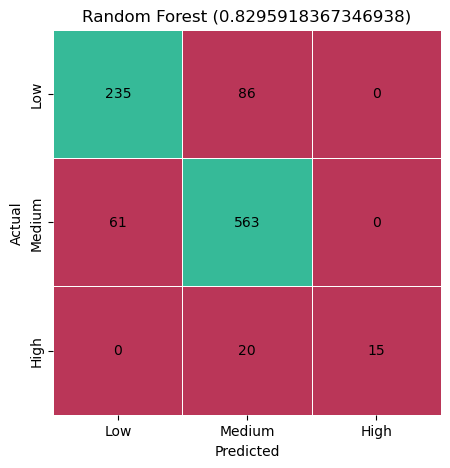

In [84]:
from matplotlib.lines import Line2D

# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(figsize=(5,5))

cm_df = pd.DataFrame(cm, index=["Low", "Medium", "High"], columns=["Low", "Medium", "High"])

cmap = sns.color_palette(["#BA3658", "#36BA98", "#BA3658", "#36BA98"])
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5, linecolor='white', annot_kws={"color": "black"})

plt.title('Random Forest (' + str(acc) + ')')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# my_colors = ["#BA3658", "#36BA98"]
# unavail_color = 'lightgray'
# handles = [
#   Line2D(
#     [], 
#     [], 
#     lw=10, 
#     color=color, 
#     label=label) 
#     for color, label in zip(my_colors + [unavail_color],
#     ['Incorrectly Predicted', 'Correctly Predicted'])]

# ax.legend(handles=handles, bbox_to_anchor=(0.5, -0.02), loc='upper center')

# ax.xaxis.set_label_position('top')
# ax.xaxis.tick_top()